In [16]:
from keras.applications import VGG16
from keras import layers, models, optimizers
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [17]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [19]:
base_dir = '/home/mukesh/ml_dl_ds/deep_learning_algorithm/dataset'

In [20]:
import os

In [21]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [22]:
data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [23]:
def extract_features(target_dir : str, sample_count : int, batch_size : int = 20):
    data_generator = data_gen.flow_from_directory(
        target_dir,
        target_size = (150, 150),
        class_mode = 'binary',
        batch_size = batch_size
    )
    i = 0
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count,))
    for input_batch, label_batch in data_generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = label_batch
        i += 1
        if i * batch_size >= sample_count:
            break 
    
    return features, labels
    

In [24]:
train_data, train_labels = extract_features(train_dir, 2000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [25]:
train_data.shape

(2000, 4, 4, 512)

In [26]:
val_data, val_labels = extract_features(val_dir, 1000)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [51]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    model.compile(
        optimizer = optimizers.RMSprop(learning_rate = 1e-4),
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    return model

In [52]:
model = get_model()

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [54]:
train_data = np.reshape(train_data, (train_data.shape[0], 4 * 4 * 512))
val_data = np.reshape(val_data, (val_data.shape[0], 4 * 4 * 512))

# history = model.fit(
#     train_data,
#     train_labels,
#     epochs = 30,
#     batch_size = 20,
#     validation_data = (val_data, val_labels)
# )

In [55]:
train_data.shape

(2000, 8192)

In [56]:
val_data.shape

(1000, 8192)

In [57]:
history = model.fit(
    train_data,
    train_labels,
    epochs = 30,
    batch_size = 20,
    validation_data = (val_data, val_labels)
)

Epoch 1/30
100/100 [==============================] - 3s 25ms/step - loss: 0.4563 - acc: 0.7825 - val_loss: 0.3033 - val_acc: 0.8870
Epoch 2/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2998 - acc: 0.8720 - val_loss: 0.2555 - val_acc: 0.9020
Epoch 3/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2316 - acc: 0.9110 - val_loss: 0.2436 - val_acc: 0.8990
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2083 - acc: 0.9225 - val_loss: 0.2461 - val_acc: 0.8960
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.1837 - acc: 0.9305 - val_loss: 0.2436 - val_acc: 0.8980
Epoch 6/30
100/100 [==============================] - 2s 24ms/step - loss: 0.1523 - acc: 0.9390 - val_loss: 0.2375 - val_acc: 0.9060
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 0.1361 - acc: 0.9420 - val_loss: 0.2472 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 2s 24ms/step - 

In [58]:
test_data, test_label = extract_features(test_dir, 1000)

Found 1000 images belonging to 2 classes.
1/1 [==============================] - 1s 1s/step


In [59]:
hist = history.history

In [60]:
import matplotlib.pyplot as plt


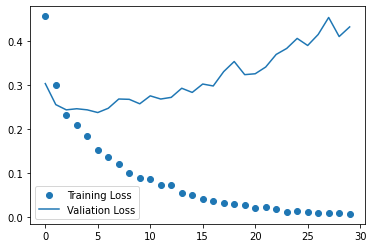

In [61]:
plt.scatter(range(len(hist['loss'])), hist['loss'], label = 'Training Loss')
plt.plot(range(len(hist['val_loss'])), hist['val_loss'], label = 'Valiation Loss')
plt.legend(loc = 'best')
plt.show()

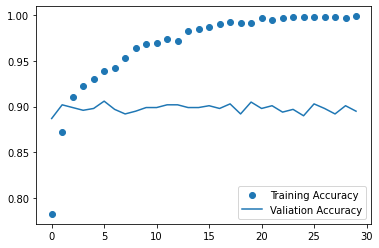

In [62]:
plt.scatter(range(len(hist['acc'])), hist['acc'], label = 'Training Accuracy')
plt.plot(range(len(hist['val_acc'])), hist['val_acc'], label = 'Valiation Accuracy')
plt.legend(loc = 'best')
plt.show()

In [65]:
test_data = np.reshape(test_data, (test_data.shape[0], 4 * 4 * 512))

In [66]:
res = model.evaluate(test_data, test_label)

32/32 [==============================] - 0s 3ms/step - loss: 0.4433 - acc: 0.8850
